# Predicting a Biological Response
Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response). Признаки нормализаваны.

## sklearn.ensemble.RandomForestClassifier

### Предоброботка данных

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import ensemble, model_selection, metrics

import pandas as pd
import numpy as np

In [3]:
bioresponce = pd.read_csv('biological_response.csv')

In [4]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [5]:
bioresponce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [6]:
bioresponce.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [7]:
bioresponce_target=bioresponce['Activity'].values

In [8]:
print('bioresponse = 1: {:.2f}\nbioresponse = 0: {:.2f}'.format(sum(bioresponce_target)/float(len(bioresponce_target)), 
                1.0 - sum(bioresponce_target)/float(len(bioresponce_target))))

bioresponse = 1: 0.54
bioresponse = 0: 0.46


In [9]:
bioresponce_data = bioresponce.iloc[:, 1:]

### Модель RandomForestClassifier
#### Кривые обучения для деревьев небольшой глубиной
Проанализируем, как зависит качество модели от количества обучающих объектов выборки

In [10]:
rf_classifier_low_depth=ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [11]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(
    rf_classifier_low_depth, bioresponce_data, bioresponce_target, 
    train_sizes=np.arange(0.1,1., 0.1), cv=3, scoring='accuracy'
    )

In [12]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 250  500  750 1000 1250 1500 1750 2000 2250]
[0.74933333 0.72933333 0.71333333 0.69166667 0.68453333 0.68622222
 0.69104762 0.68283333 0.69022222]
[0.62356685 0.6382284  0.64195598 0.64089656 0.65369955 0.65422712
 0.66248974 0.66248889 0.66728527]


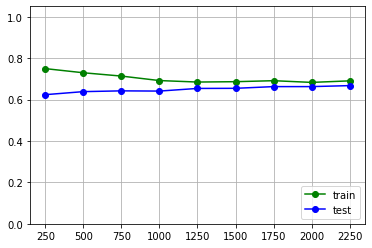

In [13]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o',  label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'b-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

В начале качество на обучающей выборке падает— приблизительно до отметки 1250 деревьев, и дальше качество меняется очень медленно. С другой стороны, на тестовой выборке качество продолжает расти приблизительно до этой же точки, и дальше оно также перестает меняться. Вывод: дальнейший рост обучающей выборки вряд ли скажется на качестве модели. Это говорит о том, что модель данной сложности не может многое выиграть за счет того, что мы обогатим данные. 

#### Кривые обучения для деревьев большей глубины

In [14]:
rf_classifier=ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [15]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(
    rf_classifier, bioresponce_data, bioresponce_target, 
    train_sizes=np.arange(0.1,1.,0.1), cv=3, scoring='accuracy'
)

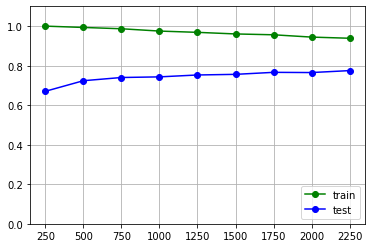

In [16]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis=1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis=1), 'b-', marker='o', label='test')
pylab.ylim(0.0, 1.1)
pylab.legend(loc='lower right')

Здесь наблюдается в некоторой степени противоположная ситуация — с ростом обучающей выборки, качество на тесте продолжает расти. Потом рост замедляется, но тем не менее тренд заметен. То же самое можно сказать и про обучение — качество на обучающей выборке продолжает падать не очень быстро. Вывод: модель данной сложности действительно получает некоторые преимущества от того, что добавляются объекты в обучение. Таким образом, в данном случае имеет смысл увеличивать объем обучающей выборки. 

Объем обучающей выборки и сложность модели значительно сказываются на времени построения модели. С этой точки зрения строить кривые обучения очень полезно — так можно проанализировать, имеет ли смысл добавлять больше данных в обучение.